In [1]:
!pip install bing-image-downloader

In [2]:
cd /content/drive/My Drive/internship

/content/drive/My Drive/internship


In [3]:
!ls

 python  'Untitled folder'


In [4]:
!mkdir images

In [5]:
cd images

/content/drive/My Drive/internship/images


In [17]:
import os
from skimage.io import imread
from skimage.transform import resize

In [85]:
target = []   # This is the list of Target Output
flat_data = []   # Image pixel in flatten style
images= []
path = '/content/drive/My Drive/internship/images/images/'
for dirpath, dirnames, filenames in os.walk(path):
  for filename in filenames:
    category = dirpath.split('/')[-1]
    target.append(category)
    img = imread(f'{path}{category}/{filename}')
    img_resized = resize(img,(50,50,3))  # Scaling down
    flat_data.append(img_resized.flatten())
    images.append(img_resized)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

print(flat_data.shape)
print(target.shape)
print(images.shape)

#/content/drive/My Drive/AI/images/images/apple fruit/Image_1.jpg

(100, 7500)
(100,)
(100, 50, 50, 3)


In [87]:
import pandas as pd
df = pd.DataFrame(flat_data)
df['Target'] = target
x=df.iloc[:,:7500].values
y=df.iloc[:,7500].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)
#from sklearn.preprocessing import MinMaxScaler
#norm = MinMaxScaler()
#x_train = norm.fit_transform(x_train)
#x_test = norm.transform(x_test)


In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model = SVC()
#param_grid = {'C': [100], 'gamma': [0.001], 'kernel': ['rbf']}
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
model_grid = GridSearchCV(model, param_grid)
model_grid.fit(x_train,y_train)
y_pred = model_grid.predict(x_test)
print('Best params')
print(model_grid.best_params_)
print('Predicted value')
print(y_pred)
print('Source value')
print(y_test)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

Best params
{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Predicted value
['Strawberry fruit' 'Jackfruit' 'Jackfruit' 'Strawberry fruit' 'Jackfruit'
 'Strawberry fruit' 'Strawberry fruit' 'Jackfruit' 'Strawberry fruit'
 'Strawberry fruit' 'Jackfruit' 'Strawberry fruit' 'Jackfruit'
 'Strawberry fruit' 'Jackfruit' 'Jackfruit' 'Jackfruit' 'Jackfruit'
 'Strawberry fruit' 'Strawberry fruit' 'Jackfruit' 'Jackfruit'
 'Strawberry fruit' 'Jackfruit' 'Jackfruit']
Source value
['Strawberry fruit' 'Jackfruit' 'Jackfruit' 'Strawberry fruit'
 'Strawberry fruit' 'Strawberry fruit' 'Strawberry fruit' 'Jackfruit'
 'Strawberry fruit' 'Jackfruit' 'Jackfruit' 'Strawberry fruit' 'Jackfruit'
 'Jackfruit' 'Jackfruit' 'Jackfruit' 'Strawberry fruit' 'Strawberry fruit'
 'Strawberry fruit' 'Jackfruit' 'Jackfruit' 'Jackfruit' 'Strawberry fruit'
 'Jackfruit' 'Jackfruit']


array(['Strawberry fruit', 'Jackfruit', 'Jackfruit', 'Strawberry fruit',
       'Jackfruit', 'Strawberry fruit', 'Strawberry fruit', 'Jackfruit',
       'Strawberry fruit', 'Strawberry fruit', 'Jackfruit',
       'Strawberry fruit', 'Jackfruit', 'Strawberry fruit', 'Jackfruit',
       'Jackfruit', 'Jackfruit', 'Jackfruit', 'Strawberry fruit',
       'Strawberry fruit', 'Jackfruit', 'Jackfruit', 'Strawberry fruit',
       'Strawberry fruit', 'Jackfruit'], dtype=object)

In [89]:
y_test

array(['Strawberry fruit', 'Jackfruit', 'Jackfruit', 'Strawberry fruit',
       'Strawberry fruit', 'Strawberry fruit', 'Strawberry fruit',
       'Jackfruit', 'Strawberry fruit', 'Jackfruit', 'Jackfruit',
       'Strawberry fruit', 'Jackfruit', 'Jackfruit', 'Jackfruit',
       'Jackfruit', 'Strawberry fruit', 'Strawberry fruit',
       'Strawberry fruit', 'Jackfruit', 'Jackfruit', 'Jackfruit',
       'Strawberry fruit', 'Jackfruit', 'Jackfruit'], dtype=object)

In [90]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('classification Report')
print(classification_report(y_pred,y_test))

classification Report
                  precision    recall  f1-score   support

       Jackfruit       0.71      0.77      0.74        13
Strawberry fruit       0.73      0.67      0.70        12

        accuracy                           0.72        25
       macro avg       0.72      0.72      0.72        25
    weighted avg       0.72      0.72      0.72        25



In [91]:
accuracy_score(y_pred,y_test)

0.72

In [92]:
confusion_matrix(y_pred,y_test)

array([[10,  3],
       [ 4,  8]])

In [83]:
downloader.download('Strawberry fruit',limit=50,output_dir='images')



[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from http://images6.fanpop.com/image/photos/34900000/Strawberry-fruit-34914839-1920-1200.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://1.bp.blogspot.com/-pNGHQLkRuKw/UDBJwtLOucI/AAAAAAAAA0Q/g6_zcXUBcMA/s1600/Strawberry-3.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://edge.bonnieplants.com/www/uploads/20180920003336/sequoia-strawberry1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.organicfacts.net/wp-content/uploads/2013/06/Strawberry1.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Strawberry_BNC.jpg/1920px-Strawberry_BNC.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://images6.fanpop.com/image/photos/34900000/Strawberry-fruit-34914838-1600-1064.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://suttons.s3.amazonaws.com/p/FRSTR30441_3.jpg
[%] File Dow

In [84]:
downloader.download('Jackfruit',limit=50,output_dir='images')



[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Jackfruit_hanging.JPG/1200px-Jackfruit_hanging.JPG
[%] File Downloaded !

[%] Downloading Image #2 from https://i.ytimg.com/vi/QcS752xP9_Q/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://1.bp.blogspot.com/-QMUQ4BPucJo/UeWMc2PIIPI/AAAAAAAAA_A/KZZ9dSYfNu4/s1600/Artocarpus+heterophyllus+-+Jackfruit+10.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://1.bp.blogspot.com/-BN1w3Qyab70/UeWMQ74RUfI/AAAAAAAAA-Y/xjzYJhfUHVE/s1600/Artocarpus+heterophyllus+-+Jackfruit+11.JPG
[%] File Downloaded !

[%] Downloading Image #5 from https://static.toiimg.com/photo/msid-68107293/68107293.jpg?1592581
[%] File Downloaded !

[%] Downloading Image #6 from http://2.bp.blogspot.com/-QzooulqCHRY/T2rT-KadnJI/AAAAAAAAFr0/BDpalzMTcbE/s1600/bb.JPG
[%] File Downloaded !

[%] Downloading Image #7 from http://news.nationalgeographi

Prediction
['Jackfruit']
Image


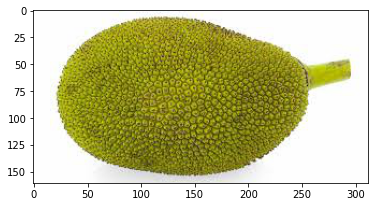

In [93]:
path='/content/drive/My Drive/internship/images/images/jackfruit.jfif'
final = imread(path)
final_size = resize(final,(50,50,3))
final_flat = final_size.flatten()
final_norm = norm.transform([final_flat])
prediction = model_grid.predict(final_norm)
print('Prediction')
print(prediction)
print('Image')
plt.imshow(final)